# Tugas Besar Tahap 2 Classification <br>
# Nama Anggota Kelompok : <br>
 **1. Anang Furkon Rifai - 1301180229** <br>
 **2. Marcello Rasel Hidayatullah - 1301184019**

# Import Library

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

# Load Dataset

In [131]:
test = "https://raw.githubusercontent.com/marcellorasel/Tubes-ML-Classification/main/salju_test.csv"
train = "https://raw.githubusercontent.com/marcellorasel/Tubes-ML-Classification/main/salju_train.csv"

In [132]:
# Dataset Test
salju_test = pd.read_csv(test) 

# Mengganti nama kolom "BersaljuBesok" menjadi "Class"
salju_test.rename(columns={'BersaljuBesok':'Class'}, inplace=True)

salju_test.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,Class
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,W,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,NW,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,N,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,SSE,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,WNW,13.0,9.0,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No


In [133]:
# Dataset Train
salju_train = pd.read_csv(train)

# Mengganti nama kolom 'BersaljuBesok' menjadi 'Class'
salju_train.rename(columns={'BersaljuBesok':'Class'}, inplace=True)

# Drop Kolom id agar jumlah kolom data train & data test sama
salju_train = salju_train.drop(columns=['id'])

salju_train.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,Class
0,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


# Pre Processing Data

In [134]:
# Mengecek jumlah data pada kolom 'Class' pada data test
salju_test['Class'].value_counts()

No     13824
Yes     3939
Name: Class, dtype: int64

In [135]:
# Mengecek jumlah data pada kolom 'Class' pada data train
salju_train['Class'].value_counts()

Tidak    82701
Ya       23963
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


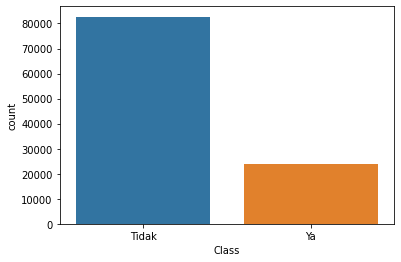

In [136]:
# Memvisualisasi data pada kolom 'Class' pada data train
train_plot = sns.countplot(salju_train['Class'])
train_plot.set_xticklabels(['Tidak','Ya'])
plt.show()

## Pre Processing Data Train

In [137]:
train_0 = salju_train[salju_train['Class'] == 'Tidak']
train_1 = salju_train[salju_train['Class'] == 'Ya']

print("Class 0 :", train_0.shape)
print("Class 1 :", train_1.shape)

Class 0 : (82701, 23)
Class 1 : (23963, 23)


In [138]:
# Oversampling Data
train_count_0, train_count_1 = salju_train['Class'].value_counts()
train_1_over = train_1.sample(train_count_0, replace = True)

salju_train_sampling = pd.concat([train_1_over, train_0], axis=0)

print("Total Class 1 and 0 :", salju_train_sampling['Class'].value_counts())

Total Class 1 and 0 : Ya       82701
Tidak    82701
Name: Class, dtype: int64


In [139]:
# Mengecek missing values
salju_train_sampling.isnull().sum()

Tanggal                         0
KodeLokasi                      0
SuhuMin                       794
SuhuMax                       335
Hujan                        2318
Penguapan                   71359
SinarMatahari               78678
ArahAnginTerkencang         11594
KecepatanAnginTerkencang    11507
ArahAngin9am                10999
ArahAngin3pm                 4856
KecepatanAngin9am            1633
KecepatanAngin3pm            3292
Kelembaban9am                2320
Kelembaban3pm                4523
Tekanan9am                  16319
Tekanan3pm                  16330
Awan9am                     60896
Awan3pm                     64208
Suhu9am                      1227
Suhu3pm                      3445
BersaljuHariIni              2318
Class                           0
dtype: int64

In [140]:
# Mengatasi Missing Values
salju_train_sampling.fillna(salju_train_sampling.median(), inplace=True)                # Nilai Numeric diisi dengan nilai median
salju_train_sampling = salju_train_sampling.fillna(salju_train_sampling.mode().iloc[0]) # Nilai String diisi dengan nilai yang paling sering muncul pada atribut

In [141]:
# Mengecek missing values
salju_train_sampling.isnull().sum()

Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
Class                       0
dtype: int64

In [142]:
# Mengecek type atribut
print(salju_train_sampling.dtypes)

Tanggal                      object
KodeLokasi                   object
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang          object
KecepatanAnginTerkencang    float64
ArahAngin9am                 object
ArahAngin3pm                 object
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni              object
Class                        object
dtype: object


In [143]:
# Menentukan Fitur Categorical
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = salju_train_sampling.columns.values.tolist()
for col in features:
    if salju_train_sampling[col].dtype in numerics: continue
    categorical_columns.append(col)

# Encoding Fitur Categorical
for col in categorical_columns:
    if col in salju_train_sampling.columns:
        enco = LabelEncoder()
        enco.fit(list(salju_train_sampling[col].astype(str).values))
        salju_train_sampling[col] = enco.transform(list(salju_train_sampling[col].astype(str).values))

In [144]:
# Mengecek type atribut
print(salju_train_sampling.dtypes)

Tanggal                       int64
KodeLokasi                    int64
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang           int64
KecepatanAnginTerkencang    float64
ArahAngin9am                  int64
ArahAngin3pm                  int64
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni               int64
Class                         int64
dtype: object


In [145]:
salju_train_sampling.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,Class
23160,2465,18,16.9,32.9,0.0,4.4,6.8,6,89.0,14,1,9.0,17.0,79.0,47.0,1016.8,1012.5,4.0,6.0,22.1,31.3,0,1
106387,1249,1,16.9,19.4,0.0,5.2,0.4,13,39.0,0,2,22.0,30.0,60.0,76.0,1014.2,1013.3,8.0,8.0,19.3,19.2,0,1
43405,2448,19,17.8,24.3,0.8,4.4,6.8,3,57.0,3,4,13.0,15.0,72.0,87.0,1013.0,1010.9,8.0,6.0,19.5,19.8,0,1
15584,3123,12,17.1,26.4,0.0,4.4,6.8,13,52.0,14,7,24.0,24.0,48.0,27.0,1006.5,1002.7,2.0,1.0,18.8,25.7,0,1
61233,2555,15,9.6,21.3,0.2,4.4,6.8,13,33.0,3,7,7.0,17.0,77.0,57.0,1017.8,1014.8,6.0,6.0,16.4,19.4,0,1


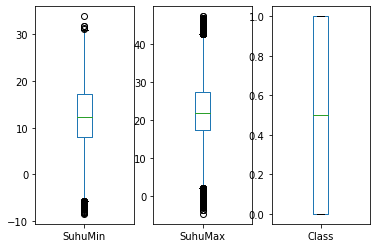

<Figure size 1440x720 with 0 Axes>

In [146]:
# Mengecek Outliers
f,axes = plt.subplots(1,3)
plt.figure(figsize=(20,10))
salju_train_sampling['SuhuMin'].plot(kind='box',ax=axes[0])
salju_train_sampling['SuhuMax'].plot(kind='box',ax=axes[1])
salju_train_sampling['Class'].plot(kind='box',ax=axes[2])

plt.show()

In [147]:
#Metode IQR untuk SuhuMin
Q1=salju_train_sampling['SuhuMin'].quantile(0.25)
Q3=salju_train_sampling['SuhuMin'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

8.0
17.2
9.2
-5.799999999999999 31.0


In [148]:
salju_train_sampling = salju_train_sampling[salju_train_sampling['SuhuMin']< Upper_Whisker]
salju_train_sampling = salju_train_sampling[salju_train_sampling['SuhuMin']> Lower_Whisker]

In [149]:
#Metode IQR untuk SuhuMax
Q1=salju_train_sampling['SuhuMax'].quantile(0.25)
Q3=salju_train_sampling['SuhuMax'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

17.2
27.4
10.2
1.9000000000000004 42.699999999999996


In [150]:
salju_train_sampling = salju_train_sampling[salju_train_sampling['SuhuMax']< Upper_Whisker]
salju_train_sampling = salju_train_sampling[salju_train_sampling['SuhuMax']> Lower_Whisker]

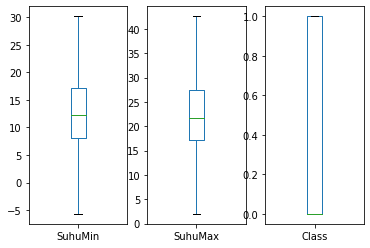

<Figure size 1440x720 with 0 Axes>

In [151]:
# Mengecek Outliers setelah menggunakan metode IQR
f,axes = plt.subplots(1,3)
plt.figure(figsize=(20,10))
salju_train_sampling['SuhuMin'].plot(kind='box',ax=axes[0])
salju_train_sampling['SuhuMax'].plot(kind='box',ax=axes[1])
salju_train_sampling['Class'].plot(kind='box',ax=axes[2])

plt.show()

In [152]:
# Mengecek Data Unique
def check(data):
  for col in data.columns:
    print(col, data[col].unique())

check(salju_train_sampling)

Tanggal [2465 1249 2448 ... 3010 1002 3153]
KodeLokasi [18  1 19 12 15 20  4 24 38 32  9 16 44  6 46 21 27 35 39 25 22 23  8 45
 17 41 28 11 26 31 10 40 48  7 33 13 37 29  2  0 14  3 36 47  5 34 42 30
 43]
SuhuMin [16.9 17.8 17.1  9.6  9.4  6.3 12.7 10.5  7.6 10.9  6.9 17.5 15.1  9.3
  4.5  4.   4.9  5.4  7.3 10.8 27.6 12.2  2.3 10.1  6.7 25.9 21.8 12.6
  8.1  1.2 20.6 19.9  1.9  9.5  8.   8.5 22.6 11.3 14.5 12.9 24.4  9.8
 20.  13.6 23.1 23.   2.9 25.2 16.5 14.  -0.3  1.6 20.5 22.   8.8 25.5
 15.8 17.9  7.   6.5 19.8 14.8 12.4 13.8 21.4  7.9 11.6  4.7 14.9 10.3
 13.9 24.6 16.7 22.2  6.  15.2  7.4 15.5 19.1 18.8  8.4 11.   4.2  5.1
 14.3 13.  25.1  5.3  8.7 26.9 11.4  6.6  9.1 25.8 20.9 22.4 26.7 12.8
 16.6 15.7  5.6 22.3  7.8 16.2 17.3 15.4 19.3 17.6 15.3 18.2 22.9 11.2
  5.5 11.7 15.  19.2 14.6  1.8 16.4 13.7  8.9 -0.4 10.  13.1 17.  12.
 12.3  0.8 13.2 19.5 20.3 24.   6.2 -0.1  0.3 15.6 14.4 22.5 18.6 10.7
  1.1 14.1 22.7  3.1 20.1 11.5 14.2 13.5 18.7 11.8 23.5 -2.7 19.7 20.7
 19.  

## Pre Processing Data Test

In [153]:
test_0 = salju_test[salju_test['Class'] == 'No']
test_1 = salju_test[salju_test['Class'] == 'Yes']

print("Class 0 :", test_0.shape)
print("Class 1 :", test_1.shape)

Class 0 : (13824, 23)
Class 1 : (3939, 23)


In [154]:
# Oversampling Data
test_count_0, test_count_1 = salju_test['Class'].value_counts()
test_1_over = test_1.sample(test_count_0, replace = True)

salju_test_sampling = pd.concat([test_1_over, test_0], axis=0)

print("Total Class 1 and 0 :", salju_test_sampling['Class'].value_counts())

Total Class 1 and 0 : No     13824
Yes    13824
Name: Class, dtype: int64


In [155]:
# Mengecek missing values
salju_test_sampling.isnull().sum()

Tanggal                         0
KodeLokasi                      0
SuhuMin                       109
SuhuMax                        53
Hujan                         326
Penguapan                   11826
SinarMatahari               13015
ArahAnginTerkencang          1850
KecepatanAnginTerkencang     1840
ArahAngin9am                 1881
ArahAngin3pm                  710
KecepatanAngin9am             264
KecepatanAngin3pm             467
Kelembaban9am                 408
Kelembaban3pm                 694
Tekanan9am                   2603
Tekanan3pm                   2588
Awan9am                     10217
Awan3pm                     10732
Suhu9am                       230
Suhu3pm                       528
BersaljuHariIni               326
Class                           0
dtype: int64

In [156]:
# Mengatasi Missing Values
salju_test_sampling.fillna(salju_test_sampling.median(), inplace=True)                # Nilai Numeric diisi dengan nilai median
salju_test_sampling = salju_test_sampling.fillna(salju_test_sampling.mode().iloc[0]) # Nilai String diisi dengan nilai yang paling sering muncul pada atribut

In [157]:
salju_test_sampling.isnull().sum()

Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
Class                       0
dtype: int64

In [158]:
# Mengecek type atribut
print(salju_test_sampling.dtypes)

Tanggal                      object
KodeLokasi                   object
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang          object
KecepatanAnginTerkencang    float64
ArahAngin9am                 object
ArahAngin3pm                 object
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni              object
Class                        object
dtype: object


In [159]:
# Menentukan Fitur Categorical
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = salju_test_sampling.columns.values.tolist()
for col in features:
    if salju_test_sampling[col].dtype in numerics: continue
    categorical_columns.append(col)

# Encoding Fitur Categorical
for col in categorical_columns:
    if col in salju_test_sampling.columns:
        enco = LabelEncoder()
        enco.fit(list(salju_test_sampling[col].astype(str).values))
        salju_test_sampling[col] = enco.transform(list(salju_test_sampling[col].astype(str).values))

In [160]:
# Mengecek type atribut
print(salju_test_sampling.dtypes)

Tanggal                       int64
KodeLokasi                    int64
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang           int64
KecepatanAnginTerkencang    float64
ArahAngin9am                  int64
ArahAngin3pm                  int64
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni               int64
Class                         int64
dtype: object


In [161]:
salju_test_sampling.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,Class
14328,1210,31,14.1,18.9,7.8,3.0,9.9,11,35.0,14,12,13.0,19.0,73.0,69.0,1020.4,1018.8,2.0,5.0,17.7,18.7,1,1
14374,210,11,18.9,21.3,5.6,7.2,0.1,11,50.0,8,10,17.0,20.0,81.0,84.0,1014.5,1013.9,6.0,6.0,19.9,19.2,1,1
9876,2783,40,12.3,18.9,8.8,4.4,6.9,1,57.0,0,13,19.0,7.0,93.0,86.0,1016.3,1014.0,6.0,6.0,12.6,17.4,1,1
7408,1246,48,23.0,29.0,17.2,36.6,6.9,10,39.0,8,9,13.0,20.0,82.0,73.0,1013.3,1011.5,5.0,8.0,26.0,28.3,1,1
6981,1908,9,10.0,17.1,2.6,4.4,6.9,14,57.0,14,13,28.0,35.0,80.0,89.0,1014.5,1014.1,8.0,8.0,15.6,14.9,1,1


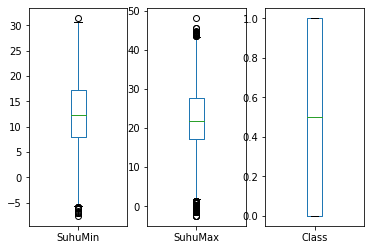

<Figure size 1440x720 with 0 Axes>

In [162]:
# Mengecek Outliers
f,axes = plt.subplots(1,3)
plt.figure(figsize=(20,10))
salju_test_sampling['SuhuMin'].plot(kind='box',ax=axes[0])
salju_test_sampling['SuhuMax'].plot(kind='box',ax=axes[1])
salju_test_sampling['Class'].plot(kind='box',ax=axes[2])

plt.show()

In [163]:
#Metode IQR untuk SuhuMin
Q1=salju_test_sampling['SuhuMin'].quantile(0.25)
Q3=salju_test_sampling['SuhuMin'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

8.0
17.2
9.2
-5.799999999999999 31.0


In [164]:
salju_test_sampling = salju_test_sampling[salju_test_sampling['SuhuMin']< Upper_Whisker]
salju_test_sampling = salju_test_sampling[salju_test_sampling['SuhuMin']> Lower_Whisker]

In [165]:
#Metode IQR untuk SuhuMax
Q1=salju_test_sampling['SuhuMax'].quantile(0.25)
Q3=salju_test_sampling['SuhuMax'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

17.2
27.7
10.5
1.4499999999999993 43.45


In [166]:
salju_test_sampling = salju_test_sampling[salju_test_sampling['SuhuMax']< Upper_Whisker]
salju_test_sampling = salju_test_sampling[salju_test_sampling['SuhuMax']> Lower_Whisker]

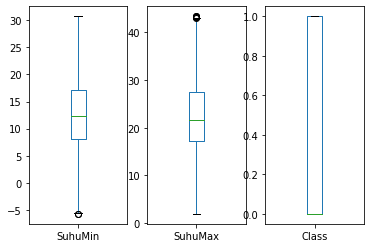

<Figure size 1440x720 with 0 Axes>

In [167]:
# Mengecek Outliers setelah menggunakan metode IQR
f,axes = plt.subplots(1,3)
plt.figure(figsize=(20,10))
salju_test_sampling['SuhuMin'].plot(kind='box',ax=axes[0])
salju_test_sampling['SuhuMax'].plot(kind='box',ax=axes[1])
salju_test_sampling['Class'].plot(kind='box',ax=axes[2])

plt.show()

In [168]:
# Mengecek Data Unique
def check(data):
  for col in data.columns:
    print(col, data[col].unique())

check(salju_test_sampling)

Tanggal [1210  210 2783 ...   62 1358  434]
KodeLokasi [31 11 40 48  9 28 44  0 14 45 27 35 23 22 26  2 37 15 10  7 17 20  6 47
  8 12 13 18  1 19  3 41 38  5 33 36 39  4 46 21 24 32 30 42 16 25 34 29
 43]
SuhuMin [14.1 18.9 12.3 23.  10.  12.1 10.1 13.1 21.8 26.1  6.8 15.4 -2.8 14.3
 16.7  8.7 22.   5.7  2.2 18.3 12.4 17.2 18.8 15.9  7.7 10.9 26.2 18.5
 27.  14.7 10.2 13.5 13.  13.6 17.5 24.4 13.7  0.2  8.8 11.  12.7 16.9
  5.2 14.8 25.3  8.9 15.3 14.  25.1  4.8 13.4  4.6 10.7 16.  20.1 11.6
  9.9 19.6 -1.8 15.2 13.3 23.7 18.6 12.9 10.8 11.3  8.3 23.8  6.6  3.4
  4.9  5.8  6.2  8.4 22.8  6.3 15.  14.4 15.5 11.1 15.7  7.2  1.6 23.4
 17.  17.4 17.8 16.6 16.5 13.9 16.2 22.6 22.3  5.   8.  17.6 22.1 13.2
 12.2  9.6 14.2  2.6  0.9 23.6  5.9  7.9  3.5  9.8  8.2  7.8 18.1  6.7
 15.8  4.3 24.6 20.   7.3  9.1 12.5 14.6 19.  18.  14.9 16.4 18.4 26.5
  3.6 24.  10.3 11.9 10.4  3.9  5.6 20.8 11.7 23.9  8.1 20.9 21.  10.5
  4.7 19.9 17.3 20.3 27.6 -0.5  3.3 11.2 12.   9.7  6.4 -3.4 18.2 12.8
 24.5

# Data Preparation
x = Feature<br>
y = Class Target

In [169]:
#Data train
x_train = salju_train_sampling.drop(['Class'], axis=1)
y_train = salju_train_sampling['Class'].values

In [170]:
x_train = x_train.values

In [171]:
#Data test
x_test = salju_test_sampling.drop(['Class'], axis=1)
y_test = salju_test_sampling['Class'].values

In [172]:
x_test = x_test.values

In [173]:
len(salju_train_sampling.columns)

23

In [174]:
len(salju_train_sampling.columns)

23

# Model

## Decision Tree

In [175]:
clf =  tree.DecisionTreeClassifier(class_weight = 'balanced', min_samples_leaf = 15, random_state = 32)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=32, splitter='best')

In [176]:
y_pred_clf = clf.predict(x_test)

In [177]:
#Showing Confusion Matrix to know True Positive, False Positive, True Negative and False Negative
cm = metrics.confusion_matrix(y_test, y_pred_clf)
cm_df = pd.DataFrame(cm,
                      columns = ['Predicted Negative', 'Predicted Positive'], 
                      index = ['Actual Negative', 'Actual Positive'])

#Assign True Positive, False Positive, True Negative and False Negative intu variable
TN = cm_df.loc['Actual Negative','Predicted Negative']
FN = cm_df.loc['Actual Positive','Predicted Negative']
FP = cm_df.loc['Actual Negative','Predicted Positive']
TP = cm_df.loc['Actual Positive','Predicted Positive']
ACC = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy       : ',ACC)
print('')
print(classification_report(y_test,y_pred_clf))

Accuracy       :  0.7276158676006242

              precision    recall  f1-score   support

           0       0.70      0.81      0.75     13780
           1       0.77      0.65      0.70     13773

    accuracy                           0.73     27553
   macro avg       0.73      0.73      0.73     27553
weighted avg       0.73      0.73      0.73     27553



## Logistic Regression

In [178]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [179]:
y_pred = logreg.predict(x_test)
print('Accuracy: {:.2f}'.format(logreg.score(x_test, y_test)))
print('')
print(classification_report(y_test,y_pred))

Accuracy: 0.77

              precision    recall  f1-score   support

           0       0.76      0.78      0.77     13780
           1       0.77      0.75      0.76     13773

    accuracy                           0.77     27553
   macro avg       0.77      0.77      0.77     27553
weighted avg       0.77      0.77      0.77     27553



## Naive Bayes

In [180]:
gnb = GaussianNB()
gnb.fit(x_train, y_train.ravel())
y_pred = gnb.predict(x_test)

In [181]:
print("Accuracy :",metrics.accuracy_score(y_test, y_pred))
print('')
print(classification_report(y_test,y_pred))

Accuracy : 0.7435125031756977

              precision    recall  f1-score   support

           0       0.73      0.78      0.75     13780
           1       0.76      0.71      0.73     13773

    accuracy                           0.74     27553
   macro avg       0.74      0.74      0.74     27553
weighted avg       0.74      0.74      0.74     27553



# Kesimpulan Akurasi

In [182]:
print('Decision Tree')
print('Accuracy       : ',ACC)
print('')
print('Logistic Regression')
print('Accuracy       : {:.2f}'.format(logreg.score(x_test, y_test)))
print('')
print('Naive bayes')
print('Accuracy       :',metrics.accuracy_score(y_test, y_pred))

Decision Tree
Accuracy       :  0.7276158676006242

Logistic Regression
Accuracy       : 0.77

Naive bayes
Accuracy       : 0.7435125031756977
